# Laboratorio 5
## 1) Calcolo zero funzione
### Esercizio 1:
Scrivere una funzione che implementi il metodo delle approssimazioni successive per il calcolo dello zero di una funzione $f(x)$ prendendo come input una delle seguenti funzioni per l’aggiornamento:
+ $g(x) = x − f(x)e^{x/2}$
+ $g(x) = x − f(x)e^{−x/2}$

Testare la funzione per trovare lo zero della funzione $f(x) = e^x − x^2$ , la cui soluzione è $x^\ast = −0.703467$.

Scrivere una funzione che implementi il metodo di Newton, ricordando che il metodo di Newton può essere considerato come un caso particolare del metodo delle approssimazioni successive dove la funzione di aggiornamento è $g(x) = x − f(x)/f′(x)$.
1. Disegnare il grafico della funzione $f$ nell’intervallo $I = [−1, 1]$ e verificare che $x^\ast$ sia lo zero di $f$ in $[−1, 1]$.
2. Calcolare lo zero della funzione utilizzando i metodi precedentemente descritti.
3. Confrontare l’accuratezza delle soluzioni trovate e il numero di iterazioni effettuate dai solutori.
4. Modificare le due funzioni in modo da calcolare l’errore ${\|x_k - x^\ast\|_2}$ ad ogni iterazione  -esima e graficare

upper_text:  HELLO WORLD
upper_text2:  HELLO WORLD
GREETINGS!
HELLO WORLD
HELLO WORLD!
fTrue =  8.035078391532835e-07


TypeError: float() argument must be a string or a real number, not 'ellipsis'

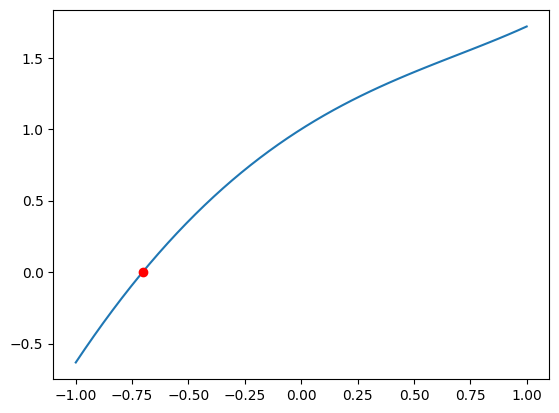

In [1]:
# Recap function

def upper_text(text):  
    return text.upper()  

upper_text2 = lambda text: text.upper()  
  
stringa = "Hello world" 

# Function call
print('upper_text: ', upper_text(stringa)) 
print('upper_text2: ', upper_text2(stringa))
      
# storing the function in a variable  
def hello(func):  
    greeting = func("Greetings!")  
    print(greeting) 

hello(upper_text2)      

def hello2(func, text = "Hello world!"):  
    greeting = func(text)  
    print(greeting)

hello2(upper_text2, stringa)
hello2(upper_text2) 

import numpy as np
import matplotlib.pyplot as plt

# Exercise 1
# Function approssimazioni successive
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  i=0
  err=np.zeros(maxit+1, dtype=np.float64)
  err[0]=tolx+1
  vecErrore=np.zeros(maxit+1, dtype=np.float64)
  vecErrore[0] = ...
  x=x0

  while (...): # scarto assoluto tra iterati
    x_new= ...
    err[i+1]= ...
    vecErrore[i+1]= ...
    i=i+1
    x=x_new
  err=err[0:i]      
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore) 

def newton(f, df, tolf, tolx, maxit, xTrue, x0=0):
    g = lambda x: ...
    (x, i, err, vecErrore) = succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
    return (x, i, err, vecErrore)

f = lambda x: np.exp(x)-x**2
df = lambda x: ...
g1 = lambda x: x-f(x)*np.exp(x/2)
g2 = lambda x: x-f(x)*np.exp(-x/2)

xTrue = -0.703467
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(-1, 1)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1)

plt.plot(sol_g1,f(sol_g1), 'o', label='g1')

[sol_g2, iter_g2, err_g2, vecErrore_g2]=succ_app(f, g2, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g2 \n x =',sol_g2,'\n iter_new=', iter_g2)

plt.plot(sol_g2,f(sol_g2), 'og', label='g2')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton)

plt.plot(sol_newton,f(sol_newton), 'ob', label='Newton')
plt.legend()
plt.grid()
plt.show()

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# g2
plt.plot(vecErrore_g2[:20], '.-', color='green')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "g2", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

### Esercizio 2:
Applicare il metodo delle approssimazioni successive e il metodo di Newton a:
+ $f(x) = x^3 + 4x\cos{x} − 2$ nell’intervallo $[0, 2]$, $g(x) = \dfrac{2 - x^3}{4\cos{x}}$, con $x^\ast \approx 0.5369$
+ $f(x) = x − x^{1/3} − 2$ nell’intervallo $[3, 5]$, $g(x) = x^{1/3} + 2$, con $x^\ast \approx 3.5213$

_Suggerimento per l’analisi dei risultati. Confronta l’accuratezza e il numero di iterazioni dei metodi al variare del punto iniziale e dei parametri per i criteri di arresto. Spiegare il comportamento dei metodi nei diversi casi._

fTrue =  1.4366462846027162e-06


TypeError: float() argument must be a string or a real number, not 'ellipsis'

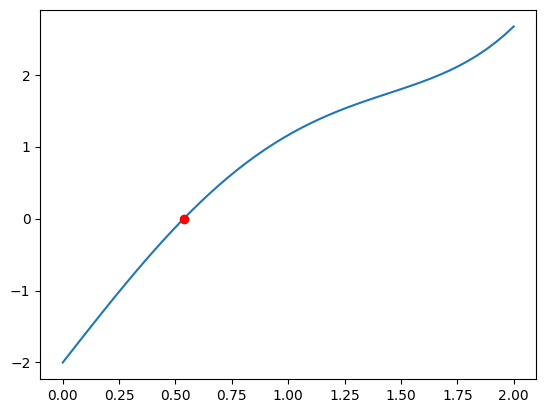

In [2]:
f = lambda x: x**3+4*x*np.cos(x)-2
df = lambda x: ...
g1 = lambda x: (2-x**3)/(4*np.cos(x))

xTrue = 0.536839
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(0, 2)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= ...

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1)

plt.plot(sol_g1,f(sol_g1), '*', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton)

plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

# Esercizio 2.2
f = lambda x: x-x**(1/3)-2
df = lambda x: ...
g1 = lambda x: x**(1/3)+2

xTrue = 3.5213
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(3, 5)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, '^r', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 3

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1)

plt.plot(sol_g1,f(sol_g1), 'o', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton)

plt.plot(sol_newton,f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()
